# Kanses Crime Rate EDA
Created by:
Elianneth Cabrera
22/07/2023

In [2]:
#installing numpy and seaborn
!pip install numpy
!pip install seaborn

In [3]:
#importing libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [4]:
#loading the data
df_2016= pd.read_csv('Kansas_2016_NIBRS.csv')
df_2017= pd.read_csv('Kansas_2017_NIBRS.csv')
df_2018= pd.read_csv('Kansas_2018_NIBRS.csv')
df_2019= pd.read_csv('Kansas_2019_NIBRS.csv')
df_2020= pd.read_csv('Kansas_2020_NIBRS.csv')

In [5]:
#concadenating the datasets
data= pd.concat([df_2016, df_2017, df_2018, df_2019, df_2020], ignore_index= True)
data.reset_index(drop=True)
data.head()

,Unnamed: 0,DATA_YEAR,ARRESTEE_ID,INCIDENT_ID,ARREST_DATE,ARREST_TYPE_ID,OFFENSE_TYPE_ID,AGE_ID,AGE_NUM,SEX_CODE,...,LOCATION_ID,VICTIM_ID,VICTIM_SEQ_NUM,VICTIM_TYPE_ID,ACTIVITY_TYPE_ID,AGE_ID_VICT,AGE_NUM_VICT,SEX_CODE_VICT,RACE_ID_VICT,ETHNICITY_ID_VICT
0,0,2016,24213727,82863257,13-JUN-16,Summoned / Cited,All Other Larceny,Age in Years,42.0,F,...,Residence/Home,91379459,1,Government,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2016,24213728,82863258,13-JUN-16,Summoned / Cited,All Other Larceny,Age in Years,56.0,F,...,Residence/Home,91379460,1,Government,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2016,24213729,82863259,13-JUN-16,Summoned / Cited,All Other Larceny,Age in Years,22.0,M,...,Residence/Home,91379461,1,Government,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2016,24214814,82880690,20-JUN-16,Summoned / Cited,All Other Larceny,Age in Years,47.0,M,...,Commercial/Office Building,91385710,1,Individual,NaN,Age in Years,50.0,F,Black or African American,Not Hispanic or Latino
4,4,2016,24214851,82881710,21-JUN-16,Summoned / Cited,All Other Larceny,Age in Years,22.0,F,...,Residence/Home,91385847,1,Business,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(data.shape)
print(data.columns)
print(data.dtypes)

(336228, 28)
Index(['Unnamed: 0', 'DATA_YEAR', 'ARRESTEE_ID', 'INCIDENT_ID', 'ARREST_DATE',
       'ARREST_TYPE_ID', 'OFFENSE_TYPE_ID', 'AGE_ID', 'AGE_NUM', 'SEX_CODE',
       'RACE_ID', 'ETHNICITY_ID', 'WEAPON_ID', 'SUBMISSION_DATE',
       'INCIDENT_DATE', 'INCIDENT_HOUR', 'OFFENDER_ID', 'OFFENSE_ID',
       'LOCATION_ID', 'VICTIM_ID', 'VICTIM_SEQ_NUM', 'VICTIM_TYPE_ID',
       'ACTIVITY_TYPE_ID', 'AGE_ID_VICT', 'AGE_NUM_VICT', 'SEX_CODE_VICT',
       'RACE_ID_VICT', 'ETHNICITY_ID_VICT'],
      dtype='object')
Unnamed: 0             int64
DATA_YEAR              int64
ARRESTEE_ID            int64
INCIDENT_ID            int64
ARREST_DATE           object
ARREST_TYPE_ID        object
OFFENSE_TYPE_ID       object
AGE_ID                object
AGE_NUM              float64
SEX_CODE              object
RACE_ID               object
ETHNICITY_ID          object
WEAPON_ID             object
SUBMISSION_DATE       object
INCIDENT_DATE         object
INCIDENT_HOUR          int64
OFFENDER_ID       

In [7]:
#dropping the column 'unnamed'
data= data.drop('Unnamed: 0', axis=1)

In [8]:
#verifying missing values
data.isnull().sum()

DATA_YEAR                 0
ARRESTEE_ID               0
INCIDENT_ID               0
ARREST_DATE               0
ARREST_TYPE_ID            0
OFFENSE_TYPE_ID           0
AGE_ID                    0
AGE_NUM                   1
SEX_CODE                  0
RACE_ID                   0
ETHNICITY_ID              0
WEAPON_ID                 0
SUBMISSION_DATE       66137
INCIDENT_DATE             0
INCIDENT_HOUR             0
OFFENDER_ID               0
OFFENSE_ID                0
LOCATION_ID               0
VICTIM_ID                 0
VICTIM_SEQ_NUM            0
VICTIM_TYPE_ID            0
ACTIVITY_TYPE_ID     336228
AGE_ID_VICT          198383
AGE_NUM_VICT         205912
SEX_CODE_VICT        198383
RACE_ID_VICT         198383
ETHNICITY_ID_VICT    198915
dtype: int64

In [9]:
#dropping the column 'ACTIVITY_TYPE_ID' since only contains NA values
data.drop('ACTIVITY_TYPE_ID', axis= 1, inplace= True)

## Feature Engineering

We are going to do some ligth feature engineering that we are going to do in our analysis

In [10]:
#converting columns to date format
data['ARREST_DATE'] = pd.to_datetime(data['ARREST_DATE'])
data['SUBMISSION_DATE'] = pd.to_datetime(data['SUBMISSION_DATE'])
data['INCIDENT_DATE'] = pd.to_datetime(data['INCIDENT_DATE'])

In [11]:
data['INCIDENT_HOUR'] = (pd.to_datetime(data['INCIDENT_HOUR'], format='%H')).dt.time

In [12]:
data['INCIDENT_DATE'].head()

0   2016-06-13
1   2016-06-13
2   2016-06-13
3   2016-06-11
4   2016-05-18
Name: INCIDENT_DATE, dtype: datetime64[ns]

In [13]:
#adding columns for the analysis
data['DAY_OF_WEEK']= data['INCIDENT_DATE'].dt.dayofweek
data['TIME_FOR_ARREST']= data['ARREST_DATE'] - data['INCIDENT_DATE']

#substituting the names for the entries in the column 'DAY_OF_WEEK'
day_of_week= {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thue', 4: 'Fri', 5: 'Sat', 6:'Sun'}
data['DAY_OF_WEEK']= data['DAY_OF_WEEK'].replace(day_of_week)

In [14]:
data.head()

,DATA_YEAR,ARRESTEE_ID,INCIDENT_ID,ARREST_DATE,ARREST_TYPE_ID,OFFENSE_TYPE_ID,AGE_ID,AGE_NUM,SEX_CODE,RACE_ID,...,VICTIM_ID,VICTIM_SEQ_NUM,VICTIM_TYPE_ID,AGE_ID_VICT,AGE_NUM_VICT,SEX_CODE_VICT,RACE_ID_VICT,ETHNICITY_ID_VICT,DAY_OF_WEEK,TIME_FOR_ARREST
0,2016,24213727,82863257,2016-06-13,Summoned / Cited,All Other Larceny,Age in Years,42.0,F,White,...,91379459,1,Government,NaN,NaN,NaN,NaN,NaN,Mon,0 days
1,2016,24213728,82863258,2016-06-13,Summoned / Cited,All Other Larceny,Age in Years,56.0,F,White,...,91379460,1,Government,NaN,NaN,NaN,NaN,NaN,Mon,0 days
2,2016,24213729,82863259,2016-06-13,Summoned / Cited,All Other Larceny,Age in Years,22.0,M,White,...,91379461,1,Government,NaN,NaN,NaN,NaN,NaN,Mon,0 days
3,2016,24214814,82880690,2016-06-20,Summoned / Cited,All Other Larceny,Age in Years,47.0,M,Black or African American,...,91385710,1,Individual,Age in Years,50.0,F,Black or African American,Not Hispanic or Latino,Sat,9 days
4,2016,24214851,82881710,2016-06-21,Summoned / Cited,All Other Larceny,Age in Years,22.0,F,White,...,91385847,1,Business,NaN,NaN,NaN,NaN,NaN,Wed,34 days


In [92]:
data.dtypes

DATA_YEAR                      int64
ARRESTEE_ID                    int64
INCIDENT_ID                    int64
ARREST_DATE           datetime64[ns]
ARREST_TYPE_ID                object
OFFENSE_TYPE_ID               object
AGE_ID                        object
AGE_NUM                      float64
SEX_CODE                    category
RACE_ID                       object
ETHNICITY_ID                  object
WEAPON_ID                     object
SUBMISSION_DATE       datetime64[ns]
INCIDENT_DATE         datetime64[ns]
INCIDENT_HOUR                 object
OFFENDER_ID                    int64
OFFENSE_ID                     int64
LOCATION_ID                   object
VICTIM_ID                      int64
VICTIM_SEQ_NUM                 int64
VICTIM_TYPE_ID                object
AGE_ID_VICT                   object
AGE_NUM_VICT                 float64
SEX_CODE_VICT                 object
RACE_ID_VICT                  object
ETHNICITY_ID_VICT             object
DAY_OF_WEEK                 category
T

In [98]:
data['WEAPON_ID'].unique()

array(['Unarmed', 'Lethal Cutting Instrument',
       'Club/Blackjack/Brass Knuckles', 'Firearm', 'Handgun',
       'Other Firearm', 'Shotgun', 'Rifle', 'Shotgun (Automatic)',
       'Handgun (Automatic)', 'Rifle (Automatic)', 'Firearm (Automatic)',
       'Other Firearm (Automatic)'], dtype=object)

## Victim Analysis

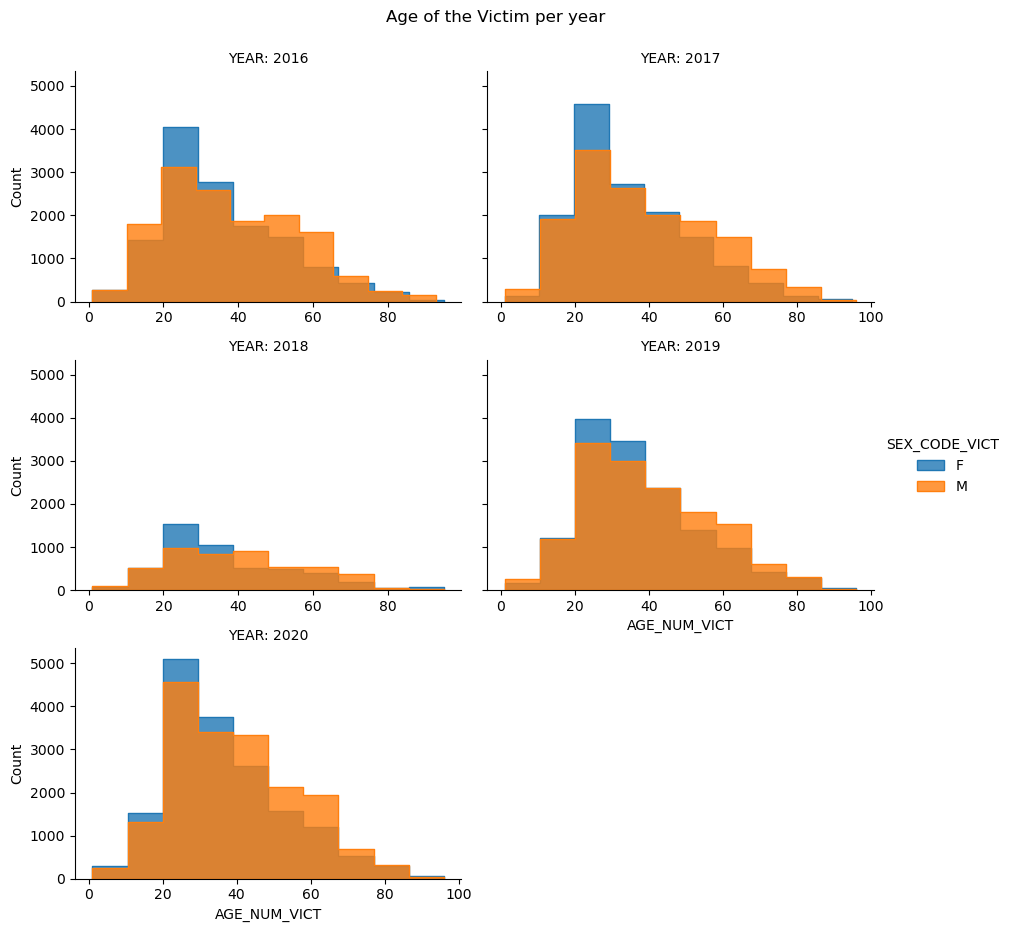

In [58]:
#changing the order of the categories
sex_order = ['M', 'F']
data['SEX_CODE'] = pd.Categorical(data['SEX_CODE'], categories=sex_order, ordered=True)

#age distribution of the victim in the years studied
g = sns.FacetGrid(data, col="DATA_YEAR", col_wrap=2, sharex= False, height=3, aspect=1.5, hue='SEX_CODE_VICT', hue_order= ['F', 'M'])
g.map(sns.histplot, "AGE_NUM_VICT", bins= 10, element='step', alpha= 0.8)
g.fig.suptitle('Age of the Victim per year', y=1.03)
g.set_titles('YEAR: {col_name}')
g.add_legend()
plt.show()

In the graph above we can observe:

1. Annually, in the range of 0 to 30 years, the highest number of victims are female.

2. In the ages older than 30 years, the majority of victims are male.

3. We observe the highest number of victims in the years 2017 and 2020.

4. The largest group of victims is within a range between 10 and 50 years.

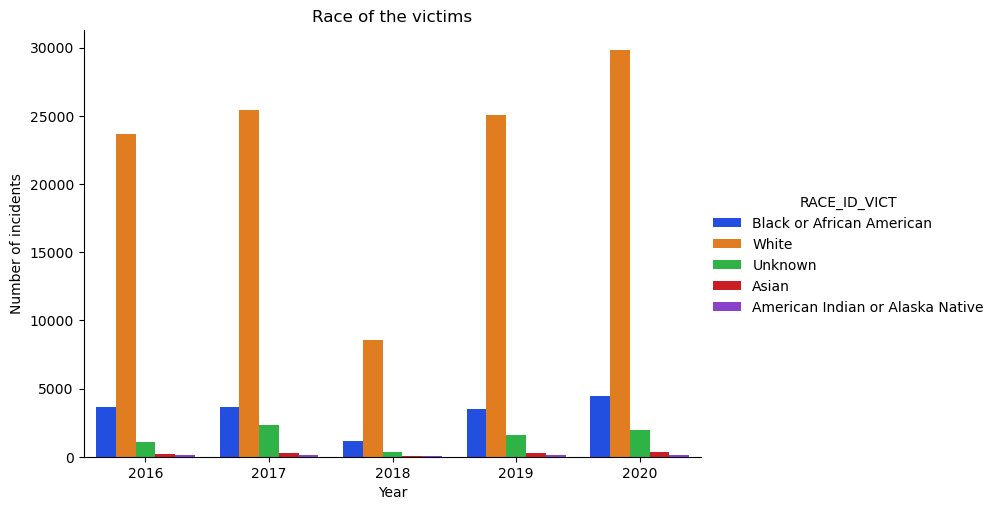

In [114]:
#number of victims by race
g = sns.catplot(x='DATA_YEAR', data=data, hue='RACE_ID_VICT', kind='count', aspect=1.5, palette='bright', ci=None)
g.set_xlabels('Year')
g.set_ylabels('Number of incidents')
g.set(title='Race of the victims')
plt.show()

During the years studied, the largest number of victims are white people.

In second place, we have African Americans.

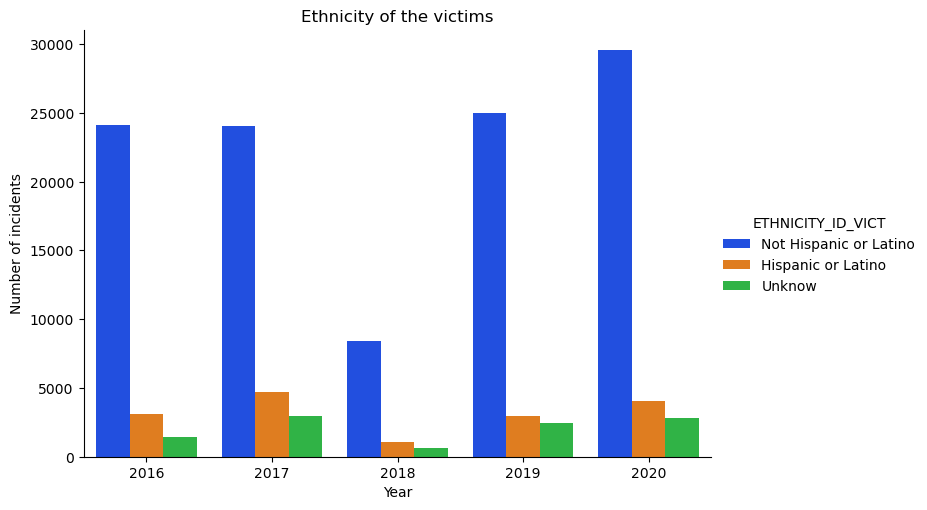

In [115]:
#number of victims by ethnicity
g = sns.catplot(x='DATA_YEAR', data=data, hue='ETHNICITY_ID_VICT', kind='count', aspect=1.5, palette='bright', ci=None)
g.set_xlabels('Year')
g.set_ylabels('Number of incidents')
g.set(title='Ethnicity of the victims')
plt.show()

In the Ethnicity group we have 3 categories:

The category with the highest number of frequency in all years was: Not Hispanic or Latino.

In second place: Hispanic or Latino.

The ratio remained the same for all years.

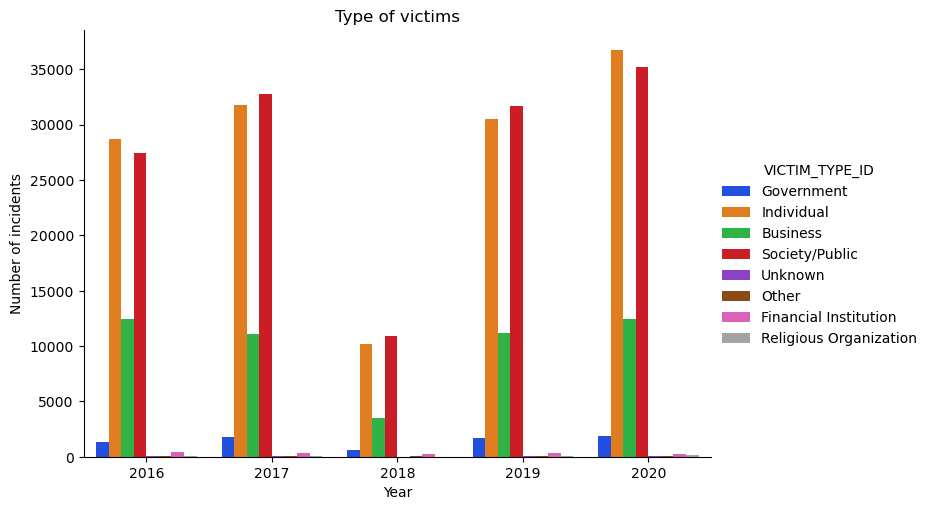

In [55]:
#victim type by year
#creating the catplot
g = sns.catplot(x='DATA_YEAR', data= data, hue='VICTIM_TYPE_ID', kind='count', aspect=1.5, palette='bright', ci=None)

#custumized the labels
g.set_axis_labels('Year', 'Number of incidents')
g.set(title='Type of victims')
plt.show()

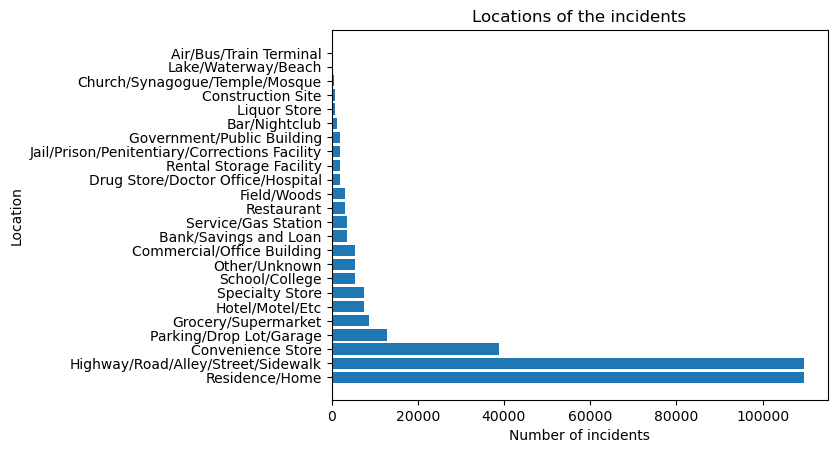

In [46]:
#location of the victim
counts = data['LOCATION_ID'].value_counts()

#bar plot
plt.barh(counts.index, counts.values)

#labels of the plot
plt.xlabel('Number of incidents')
plt.ylabel('Location')
plt.title('Locations of the incidents')
plt.show()

The main locations where incidents occur are: in Residence/Home and Highway/Road/Alley/Street/Sidewalk. They account for more than half of the cases.

In third place, Convenience/Store with almost 40,000 incidents.

## Offender Analysis

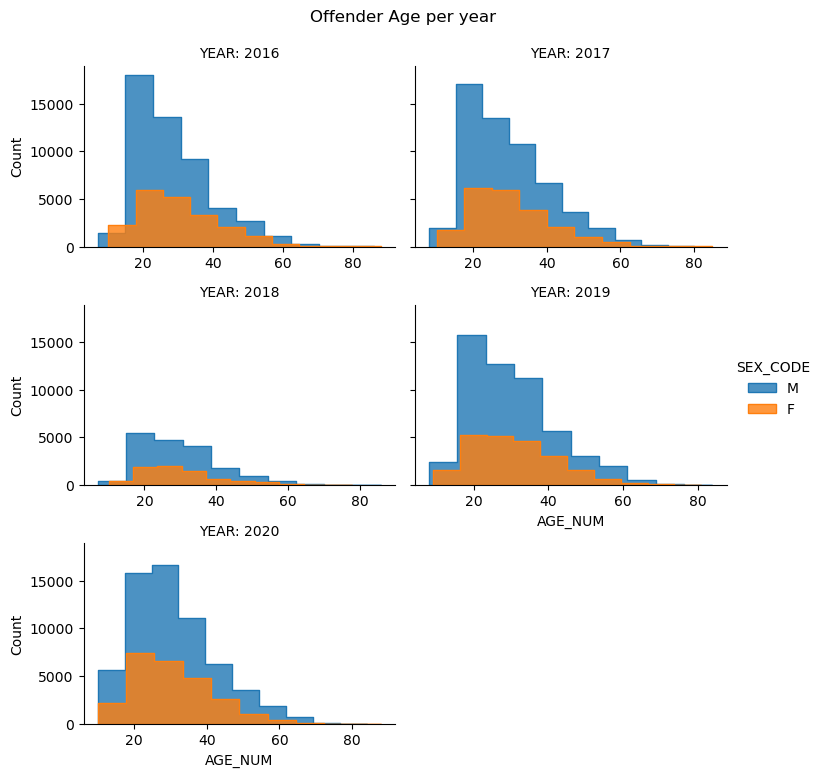

In [52]:
#changing the order of the categories
sex_order = ['F', 'M']
data['SEX_CODE'] = pd.Categorical(data['SEX_CODE'], categories=sex_order, ordered=True)

#age distribution of the victim in the years studied
g = sns.FacetGrid(data, col="DATA_YEAR", col_wrap=2, sharex= False, height=2.5, aspect=1.5, hue='SEX_CODE', hue_order= ['M', 'F'])
g.map(sns.histplot, "AGE_NUM", bins= 10, element='step', alpha= 0.8)
g.fig.suptitle('Offender Age per year', y=1.03)
g.set_titles('YEAR: {col_name}')
g.add_legend()
plt.show()

In the graph above we can see that the majority of offenders are male, ranging in age from 20 to 40 years old.

Female offenders tend to be in this age range as well, their frequency is lower in number.

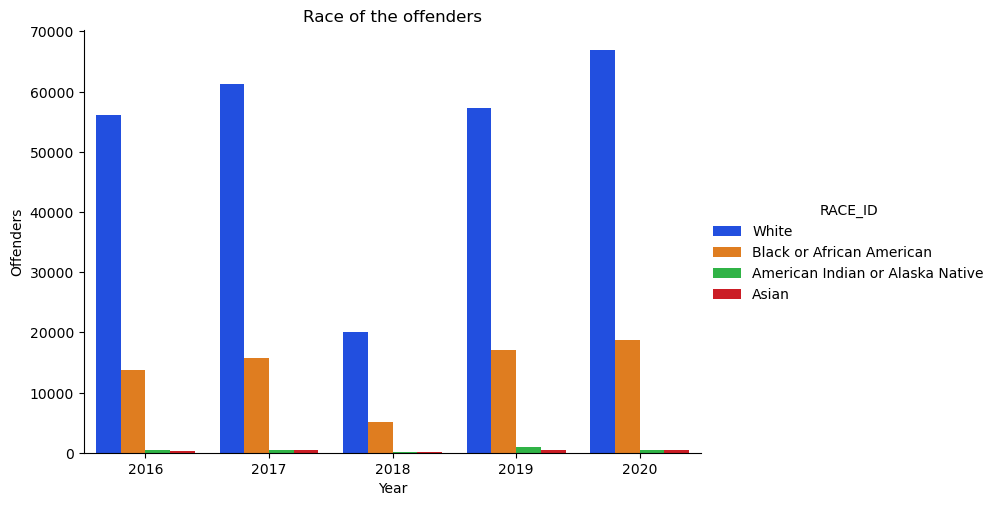

In [56]:
#offenders by race
g = sns.catplot(x='DATA_YEAR', data=data, hue='RACE_ID', kind='count', aspect=1.5, palette='bright', ci=None)
g.set_xlabels('Year')
g.set_ylabels('Offenders')
g.set(title='Race of the offenders')
plt.show()

We have 4 categories of race in offenders:

1. The highest number of offenders is white, the trend is maintained during all years of study.

2. Black offenders account for less than half of white offenders.

3. The number of incidents caused by American Indians and Asians are less than 1,000 cases each.

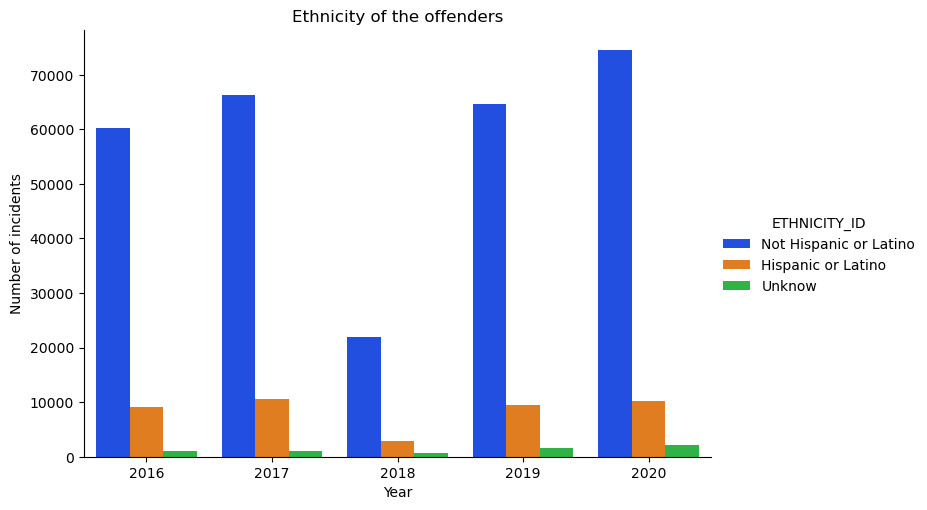

In [60]:
#ethnicity of the offenders
g = sns.catplot(x='DATA_YEAR', data=data, hue='ETHNICITY_ID', kind='count', aspect=1.5, palette='bright', ci=None)
g.set_xlabels('Year')
g.set_ylabels('Number of incidents')
g.set(title='Ethnicity of the offenders')
plt.show()

As we observe in the plot above, the majority of offenders were of Not Hispanic or Latino ethnicity, from 2016 to 2020.

## Time of the incident

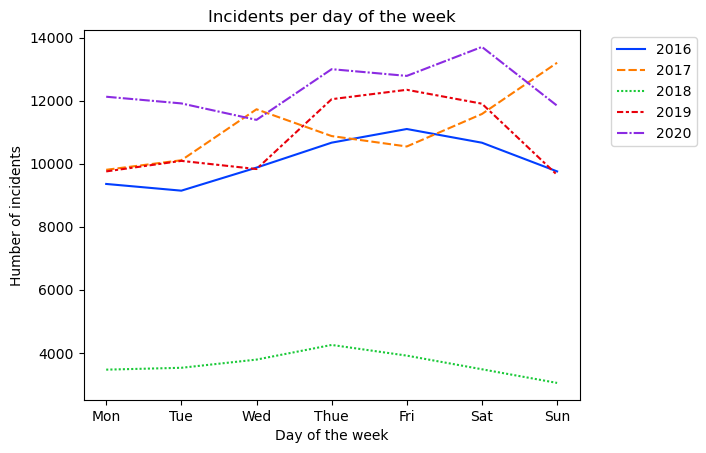

In [86]:
day_order = ['Mon', 'Tue', 'Wed', 'Thue', 'Fri', 'Sat', 'Sun']
data['DAY_OF_WEEK'] = pd.Categorical(data['DAY_OF_WEEK'], categories=day_order, ordered=True)

#group by year en day of the week
day_of_incident= data.groupby(['DATA_YEAR', 'DAY_OF_WEEK'])['INCIDENT_ID'].count()
day_of_incident= day_of_incident.to_frame().reset_index()

#creating a pivot table
day_of_week= day_of_incident.pivot(index= 'DAY_OF_WEEK', columns='DATA_YEAR', values= 'INCIDENT_ID')
day_of_week.head()

#plotting the pivot table
g= sns.lineplot(day_of_week, palette= 'bright')
g.set_xlabel('Day of the week')
g.set_ylabel('Humber of incidents')
g.set_title('Incidents per day of the week')
plt.legend(bbox_to_anchor = ( 1.05 , 1 ), loc = 2)
plt.show()


In the plot above we can see that the highest number of incidents on each day of the week were:

1. 2016: Thursday, Friday and Saturday.

2. 2017: Wednesday, Saturday and Sunday.

3. 2018: from Wednesday to Saturday.

4. 2019: Thursday, Friday and Saturday.

5. 2020: Thursday, Friday and Saturday.

In general, we can observe that the weekend and the days close to it are the days in which most incidents occur.

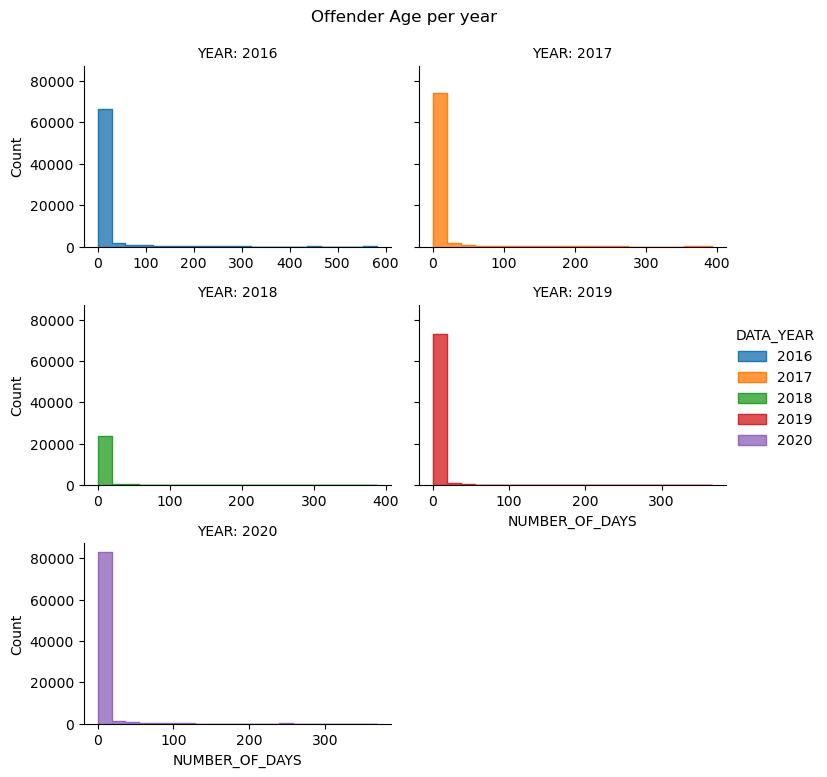

In [116]:
#group by year
data['NUMBER_OF_DAYS']= data['TIME_FOR_ARREST'].dt.days

#time between the incident and the arrest
g = sns.FacetGrid(data, col="DATA_YEAR", col_wrap=2, sharex= False, height=2.5, aspect=1.5, hue='DATA_YEAR')
g.map(sns.histplot, 'NUMBER_OF_DAYS', bins= 20, element='step', alpha= 0.8)
g.fig.suptitle('Offender Age per year', y=1.03)
g.set_titles('YEAR: {col_name}')
g.add_legend()
plt.show()

Looking at the annual plots we can see that most arrests occur before 25 days.

## Weapons

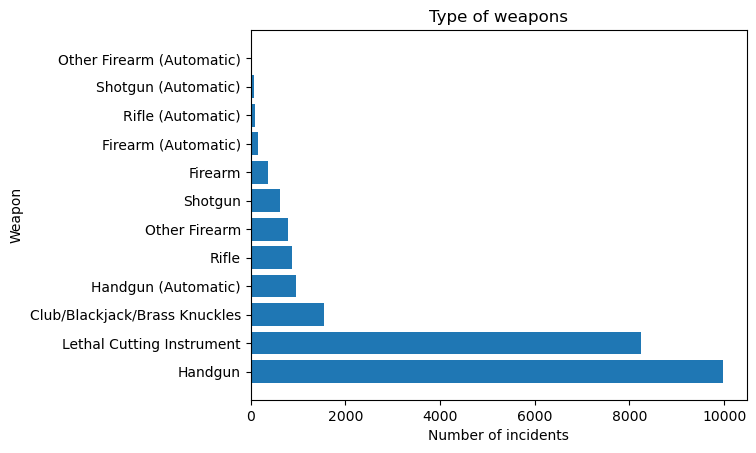

In [112]:
#types of weapons
filtered_df = data[data['WEAPON_ID'] != 'Unarmed']
counts = filtered_df['WEAPON_ID'].value_counts()

#bar plot
plt.barh(counts.index, counts.values)

#labels of the plot
plt.xlabel('Number of incidents')
plt.ylabel('Weapon')
plt.title('Type of weapons')
plt.show()

In the plot above, we can see that the five most use weapons on the attacks are:

1. Handgun.

2. Lethal cutting instrument.

3. Club/Blackjack/Brass Knuckles.

4. Handgun (Automatic).

5. Rifle.